In [ ]:
import numpy as np

# 🧩 STAGE 1 — Prerequisites Review

Before diving in, make sure you recall these:

---

### • Inner product (dot product)
$$
\langle u, v \rangle = u_1 v_1 + u_2 v_2 + \dots + u_n v_n
$$

---

### • Norm (length of a vector)
$$
\|v\| = \sqrt{\langle v, v \rangle}
$$

---

### • Linear independence and basis
- A **basis** is a set of linearly independent vectors that spans the space.

In [ ]:
u = np.array([3,4])

In [ ]:
v = np.array([4, -3])

In [ ]:
print("Dot product = ", np.dot(u,v))

In [ ]:
print("Orthogonal? ", np.isclose(np.dot(u,v), 0))

# 🧱 STAGE 2 — Orthogonal Bases

## Concept

Vectors \( v_1, \ldots, v_n \) are **orthogonal** if

$$
\langle v_i, v_j \rangle = 0 \quad \text{for all } i \ne j
$$

---

## Why it matters

- **Coordinates become independent** — projections along one direction don’t affect others.
- **Any vector** \( x \) **can be expressed uniquely as:**

$$
x = \sum_i c_i v_i,
\quad
c_i = \frac{\langle x, v_i \rangle}{\langle v_i, v_i \rangle}
$$

In [ ]:
v1 = np.array([1, 1])
v2 = np.array([1, -1])
x = np.array([2, 3])
coeffs = [np.dot(x, v1)/np.dot(v1, v1), np.dot(x, v2)/np.dot(v2, v2)]
print("Coefficients in orthogonal basis:", coeffs)

# 🧭 STAGE 3 — Orthonormal Bases

## Concept

Vectors are **orthonormal** if they are orthogonal *and* of unit length:

$$
\langle v_i, v_j \rangle =
\begin{cases}
1, & i = j \\
0, & i \ne j
\end{cases}
$$

---

## Simplification

Now coefficients become:

$$
c_i = \langle x, v_i \rangle
$$

→ **No need to divide by** \( \|v_i\|^2 \).# STAGE 3 — Orthonormal Bases

## Concept

Vectors are **orthonormal** if they are orthogonal *and* of unit length:

$$
\langle v_i, v_j \rangle =
\begin{cases}
1, & i = j \\
0, & i \ne j
\end{cases}
$$

---

## Simplification

Now coefficients become:

$$
c_i = \langle x, v_i \rangle
$$

→ **No need to divide by**
 $$
  \|v_i\|^2
 $$

In [ ]:
import numpy as np
v1 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
v2 = np.array([1/np.sqrt(2), -1/np.sqrt(2)])
x = np.array([2, 3])
coeffs = [np.dot(x, v1), np.dot(x, v2)]
print("Coefficients in orthonormal basis:", coeffs)

# 🧮 STAGE 4 — Gram–Schmidt Process

Used to **convert any basis** into an **orthonormal** one.

---

1. **Start with linearly independent vectors**

   $$
   u_1, \; u_2, \; \ldots, \; u_n
   $$

2. **Subtract projections to make them orthogonal:**

   $$
   v_k = u_k - \sum_{i=1}^{k-1}
   \frac{\langle u_k, v_i \rangle}{\langle v_i, v_i \rangle} v_i
   $$

3. **Normalize each:**

   $$
   e_k = \frac{v_k}{\|v_k\|}
   $$

In [ ]:
import numpy as np

u = [
    np.array([1, 1, 0], dtype=float),
    np.array([1, 0, 1], dtype=float),
    np.array([0, 1, 1], dtype=float),
]

v = []
for i in range(len(u)):
    v_i = u[i].copy()                  # float array
    for j in range(i):
        # use v_i here (not u[i]) and avoid dtype issues
        v_i = v_i - (np.dot(v_i, v[j]) / np.dot(v[j], v[j])) * v[j]
    v.append(v_i)

e = [v_i / np.linalg.norm(v_i) for v_i in v]
print("Orthonormal basis:\n", np.array(e))

# 🧠 STAGE 5 — Concept Reinforcement

## Key properties

---

### Orthogonal projection
$$
\operatorname{proj}_v(x) = \frac{\langle x, v \rangle}{\langle v, v \rangle} \, v
$$

---

### Orthonormal projection
$$
\operatorname{proj}_v(x) = \langle x, v \rangle \, v
$$

---

### Length preservation
Orthonormal basis preserves vector lengths.

---

### Matrix view
Columns of orthonormal matrix \( Q \) satisfy:
$$
Q^{\top} Q = I
$$

In [ ]:
Q = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
              [1/np.sqrt(2), -1/np.sqrt(2)]])
print("QᵀQ =\n", Q.T @ Q)

# 🧩 STAGE 6 — Practice Tasks

1. **Check orthogonality:**
   Given three vectors in $ \mathbb{R}^3 $, decide if they’re orthogonal by verifying
   $$
   \langle v_i, v_j \rangle = 0 \quad \text{for all } i \ne j
   $$

2. **Normalize:**
   Compute the unit (normalized) vectors
   $$
   \hat{v}_i = \frac{v_i}{\|v_i\|}
   $$

3. **Apply Gram–Schmidt:**
   Orthogonalize a linearly independent set using
   $$
   v_k = u_k - \sum_{i=1}^{k-1}
   \frac{\langle u_k, v_i \rangle}{\langle v_i, v_i \rangle} \, v_i
   $$
   and normalize with
   $$
   e_k = \frac{v_k}{\|v_k\|}
   $$

4. **Compute projection:**
   Find the projection of $ x $ onto the subspace spanned by $ v_1, v_2 $:
   $$
   \operatorname{proj}_S(x)
   = \frac{\langle x, v_1 \rangle}{\langle v_1, v_1 \rangle} v_1
   + \frac{\langle x, v_2 \rangle}{\langle v_2, v_2 \rangle} v_2
   $$

5. **Find coefficients:**
   Express $ x $ in the orthonormal basis $ \{ v_1, v_2, \ldots, v_n \} $:
   $$
   x = \sum_i c_i v_i, \qquad c_i = \langle x, v_i \rangle
   $$
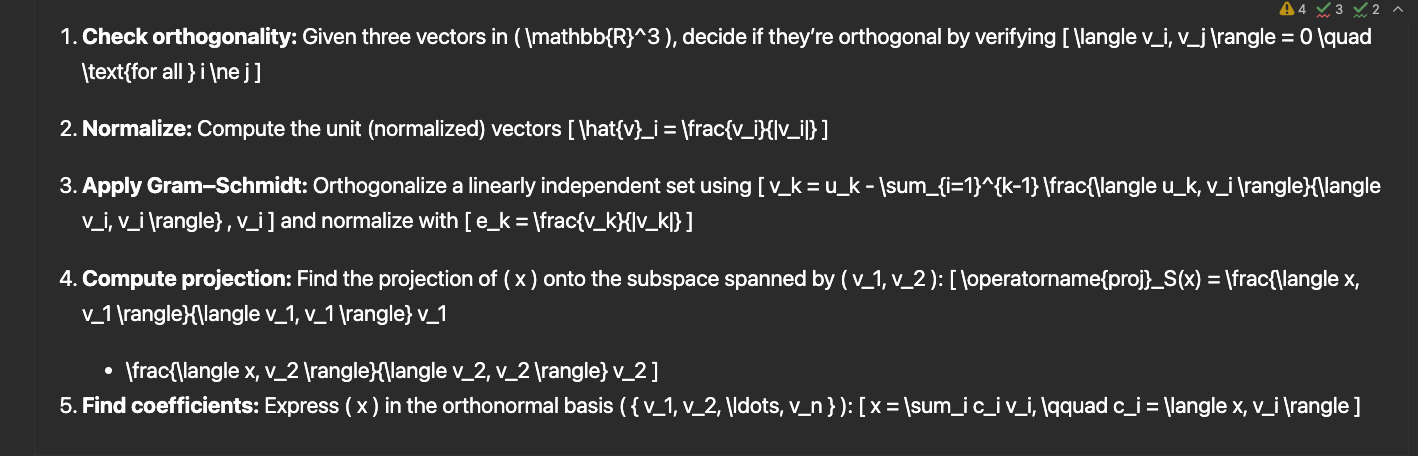